In [19]:
#!/usr/bin/env python

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from modules.myfuncs import *



## Query SQLite3 db into Pandas

In [20]:
conn = create_connection('database/rlc.db')  # function from myfuncs file
c = conn.cursor()


sqlite3 version: 2.6.0
connected to database/rlc.db


In [21]:
sql_fetch_tables(c, conn)

[('intersection_locations',),
 ('hourly_congestion',),
 ('congestion_regions',),
 ('hourly_weather',),
 ('intersection_cams',),
 ('daily_violations',),
 ('cam_locations',),
 ('inersection_locations',),
 ('inersection_cams',),
 ('signal_crashes',),
 ('cam_startend',)]

In [22]:
results_df = pd.read_sql_query("SELECT * FROM daily_violations;", conn)

print(len(results_df))
results_df.head()

camloc_df = pd.read_sql_query('SELECT * FROM cam_locations', conn)
results_df.head()

572318


intersection camera_id                 address  \
0  IRVING PARK AND KILPATRICK      2763  4700 W IRVING PARK ROA   
1           115TH AND HALSTED      2552   11500 S HALSTED STREE   
2  IRVING PARK AND KILPATRICK      2764  4700 W IRVING PARK ROA   
3      ELSTON AND IRVING PARK      1503  3700 W IRVING PARK ROA   
4                4700 WESTERN      2141   4700 S WESTERN AVENUE   

        violation_date  violations   latitude  longitude  month  weekday  year  
0  2015-04-09 00:00:00           4  41.953866 -87.716609      4        3  2015  
1  2015-04-08 00:00:00           5  41.684766 -87.642607      4        2  2015  
2  2015-04-19 00:00:00           4  41.953866 -87.716609      4        6  2015  
3  2015-04-23 00:00:00           3  41.953838 -87.720427      4        3  2015  
4  2019-06-05 00:00:00           3  41.808378 -87.684571      6        2  2019

## Add the cam locations to the results_df
At later point, this should be fixed within the db. Takes a while to run (XX minutes)
This was a pain to figure out. The axis=1 kwarg .apply() on whole row is where it got tricky


In [23]:
results_df.head()

intersection camera_id                 address  \
0  IRVING PARK AND KILPATRICK      2763  4700 W IRVING PARK ROA   
1           115TH AND HALSTED      2552   11500 S HALSTED STREE   
2  IRVING PARK AND KILPATRICK      2764  4700 W IRVING PARK ROA   
3      ELSTON AND IRVING PARK      1503  3700 W IRVING PARK ROA   
4                4700 WESTERN      2141   4700 S WESTERN AVENUE   

        violation_date  violations   latitude  longitude  month  weekday  year  
0  2015-04-09 00:00:00           4  41.953866 -87.716609      4        3  2015  
1  2015-04-08 00:00:00           5  41.684766 -87.642607      4        2  2015  
2  2015-04-19 00:00:00           4  41.953866 -87.716609      4        6  2015  
3  2015-04-23 00:00:00           3  41.953838 -87.720427      4        3  2015  
4  2019-06-05 00:00:00           3  41.808378 -87.684571      6        2  2019

## Investigate results

In [24]:
results_df.isna().sum()
results_df.head()

intersection camera_id                 address  \
0  IRVING PARK AND KILPATRICK      2763  4700 W IRVING PARK ROA   
1           115TH AND HALSTED      2552   11500 S HALSTED STREE   
2  IRVING PARK AND KILPATRICK      2764  4700 W IRVING PARK ROA   
3      ELSTON AND IRVING PARK      1503  3700 W IRVING PARK ROA   
4                4700 WESTERN      2141   4700 S WESTERN AVENUE   

        violation_date  violations   latitude  longitude  month  weekday  year  
0  2015-04-09 00:00:00           4  41.953866 -87.716609      4        3  2015  
1  2015-04-08 00:00:00           5  41.684766 -87.642607      4        2  2015  
2  2015-04-19 00:00:00           4  41.953866 -87.716609      4        6  2015  
3  2015-04-23 00:00:00           3  41.953838 -87.720427      4        3  2015  
4  2019-06-05 00:00:00           3  41.808378 -87.684571      6        2  2019

## Coerce my columns and make new ones

In [25]:
from datetime import datetime
results_df.info()
results_df['violations'] = results_df['violations'].apply(int)
results_df['latitude'] = results_df['latitude'].apply(float)
results_df['longitude'] = results_df['longitude'].apply(float)
results_df['violation_date'] = pd.to_datetime(results_df['violation_date'])
results_df['month'] = results_df['violation_date'].apply(lambda x: x.month)
results_df['weekday'] = results_df['violation_date'].apply(lambda x: datetime.weekday(x))
results_df['year'] = results_df['violation_date'].apply(lambda x: x.year)


results_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572318 entries, 0 to 572317
Data columns (total 10 columns):
intersection      572318 non-null object
camera_id         572318 non-null object
address           572318 non-null object
violation_date    572318 non-null object
violations        572318 non-null int64
latitude          572318 non-null float64
longitude         572318 non-null float64
month             572318 non-null int64
weekday           572318 non-null int64
year              572318 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 43.7+ MB


intersection camera_id                address  \
572313   WENTWORTH AND GARFIELD      2264    200 W GARFIELD BLVD   
572314         WESTERN AND 79TH      2484         2400 W 79TH ST   
572315          CICERO AND 47TH      2204         4800 W 47TH ST   
572316  ASHLAND AND IRVING PARK      1151  4000 N ASHLAND AVENUE   
572317         55TH and PULASKI      2242         5500 S PULASKI   

       violation_date  violations   latitude  longitude  month  weekday  year  
572313     2020-12-10          41  41.794670 -87.630547     12        3  2020  
572314     2020-12-31           2  41.750220 -87.682818     12        3  2020  
572315     2020-12-31           2  41.807727 -87.743229     12        3  2020  
572316     2020-12-31           3  41.954379 -87.669199     12        3  2020  
572317     2020-12-31           3  41.793155 -87.723304     12        3  2020

# EDA

Does the day of the week have any effect on the number of violations?

   weekday  violations
0        0      429214
1        1      431153
2        2      439591
3        3      460925
4        4      504201


[]

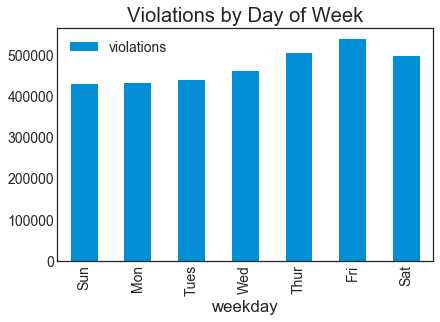

In [26]:

plt.style.use('seaborn-white')


# Weekday plot
df_weekday = results_df.groupby(['weekday'])['violations'].sum().reset_index()
print(df_weekday.head())


ax = df_weekday.plot.bar('weekday', 'violations')
labels = ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat']
ax.set_xticklabels(labels)
ax.set_title("Violations by Day of Week")
plt.plot()

Does the month of the year have any effect on violations?
Note: Not all months have same days.  I could normalize if needed.

   month  violations
0      1      215123
1      2      214437
2      3      252109
3      4      249922
4      5      294373


[]

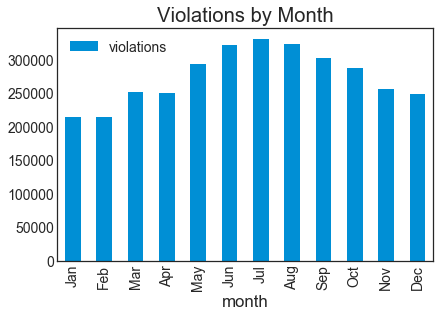

In [27]:
# Month plot
df_month = results_df.groupby(['month'])['violations'].sum().reset_index()
print(df_month.head())

ax2 = df_month.plot.bar('month', 'violations')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.set_xticklabels(labels)
ax2.set_title("Violations by Month")
plt.plot()

Did the violations change by year?

Text(0.5, 1.0, 'Violations by Year')

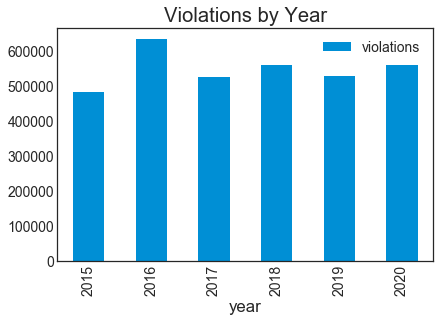

In [28]:
# Year plot
df_year = results_df.groupby(['year'])['violations'].sum().reset_index()

ax4 = df_year.plot.bar('year', 'violations')
ax4.set_title("Violations by Year")

Which cameras are the big money makers for the city?

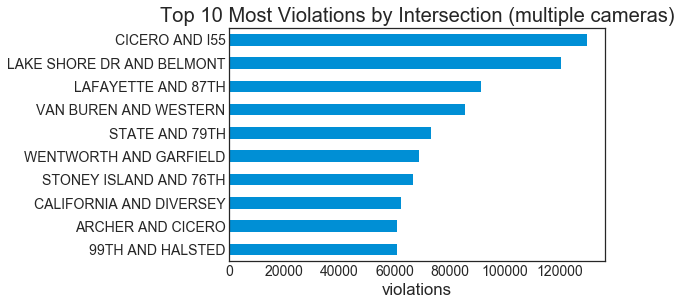

In [29]:
# top 10 plot
df_top10 = results_df.groupby(['intersection'])['violations'].sum().reset_index()
df_top10 = df_top10.sort_values(['violations'], ascending=True).tail(10)
ax3 = df_top10.plot.barh(y='violations', x='intersection')

ax3.set_title("Top 10 Most Violations by Intersection (multiple cameras)")
ax3.set_ylabel('') # do this post plot, you have to talk to y, even in a barh
ax3.set_xlabel('violations')
ax3.get_legend().remove()

plt.show()# box plot all cameras

What does the boxplot look like for all the cameras 

<Figure size 720x576 with 0 Axes>

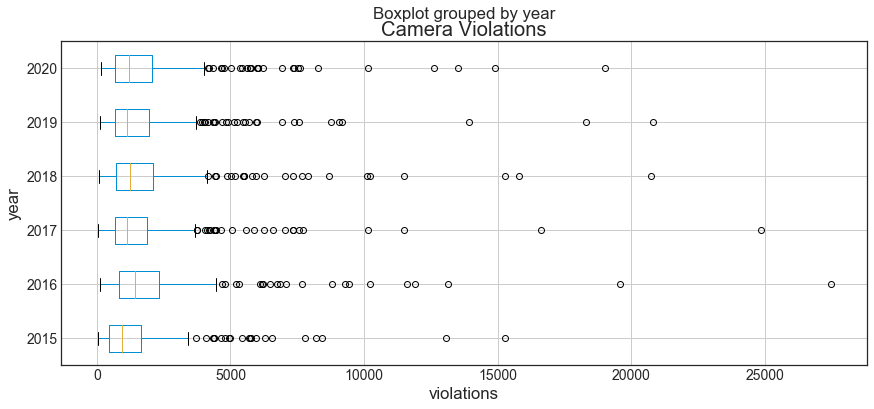

In [30]:
# plotly is not supported with boxplot

plt.figure(figsize=[10,8])
#results_df.groupby(['camera_id'])['violations'].sum().reset_index().boxplot('violations')
#results_df.groupby(['year', 'camera_id']).sum().reset_index().boxplot(by='year')

#results_df.groupbyboxplot(column=['SepalLength'], by='Name', ax=ax)
results_df.groupby(['year', 'camera_id']).sum().reset_index()[['year', 'violations']].boxplot(by='year', vert=False, figsize=[14,6])
plt.xlabel('violations')
plt.ylabel('year')
plt.title('Camera Violations')
plt.show()

# change back to plotly


In [31]:
# basic pd info
print('All Data')
print(results_df['violations'].describe())

print('\n'*2 + 'Weekday Grouped Violations')
print(df_weekday['violations'].describe())

print('\n'*2 + 'Monthly Grouped Violations')
print(df_month['violations'].describe())


All Data
count    572318.000000
mean          5.767103
std           7.471819
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         186.000000
Name: violations, dtype: float64


Weekday Grouped Violations
count         7.000000
mean     471516.714286
std       42353.380254
min      429214.000000
25%      435372.000000
50%      460925.000000
75%      500577.500000
max      538579.000000
Name: violations, dtype: float64


Monthly Grouped Violations
count        12.000000
mean     275051.416667
std       41109.751346
min      214437.000000
25%      249838.500000
50%      272069.000000
75%      307578.000000
max      331475.000000
Name: violations, dtype: float64


What does this look like on a map?  Does it make sense?

In [32]:
import plotly.express as px



df_plot = results_df.groupby(['camera_id', 'intersection', 'latitude', 'longitude', 'address'], as_index=True)['violations'].sum().reset_index()
print(df_plot.head())
df_plot['lat'] = df_plot['latitude'].apply(lambda x: '{:.2f}'.format(x))
df_plot['long'] = df_plot['longitude'].apply(lambda x: '{:.2f}'.format(x))



# fig = px.scatter_geo(results_df.groupby('camera_id').sum(), locations="iso_alpha",
#                      color="violations", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="violations", # size of markers
#                      projection="natural earth")

#px.scatter_mapbox?
fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="violations",
                        hover_name='intersection',
                        size='violations',
                        #label=['lat','long','violations'],
                        color_continuous_scale='BlueRed', 
                        #range_color=[range_min, range],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.6,
                        height=700,
                        hover_data={'camera_id':False, 'lat':False, 'long':':.2f', 'latitude':False} ,
                       )

fig.update_layout(mapbox_style="stamen-toner")  #, hoverlabel={}. MAYBE??
#fig.update_layout (textposition='top left', textfont_size=40)

#fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()


  camera_id                  intersection   latitude  longitude  \
0      1002            WESTERN AND CERMAK  41.851984 -87.685786   
1      1003            WESTERN AND CERMAK  41.852141 -87.685753   
2      1011          PETERSON AND WESTERN  41.990586 -87.689822   
3      1014          PETERSON AND WESTERN  41.990609 -87.689735   
4      1023  IRVING PARK AND NARRAGANSETT  41.953025 -87.786683   

                 address  violations  
0  2200 S WESTERN AVENUE        9860  
1     2400 W CERMAK ROAD        3442  
2     6000 N WESTERN AVE        7471  
3        2400 W PETERSON       14272  
4       6400 W IRVING PK        4766  


If I set it up with animation, does it add any value?  (year, month, weekday)

In [33]:
import plotly.express as px



df_plot = results_df.groupby(['year', 'intersection', 'latitude', 'longitude', 'month', 'address',  'camera_id'])['violations'].sum().reset_index()
#weekday_dfs = []
#for i in range(7):
#    weekday_dfs.append(df_plot = results_df[results_df['weekday']==i])


# fig = px.scatter_geo(results_df.groupby('camera_id').sum(), locations="iso_alpha",
#                      color="violations", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="violations", # size of markers
#                      projection="natural earth")

#px.scatter_mapbox?

fig = px.scatter_mapbox(df_plot, 
                        lat="latitude", 
                        lon="longitude", 
                        color="violations",
                        #text='address',
                        animation_frame='year',
                        size='violations',
                        hover_name='intersection',
                        labels=['violations', 'latitude', 'longitude'],
                        color_continuous_scale='Plotly3', 
                        #range_color=[1000, 20000],
                        #center={'lat':41.975605, 'lon': -87.731670},
                        zoom=9.5,
                        opacity=0.6,
                        
                       )
#fig.update_layout(mapbox_style="stamen-toner")
fig.update_layout(mapbox_style="open-street-map", height=800)

fig.show()

In [34]:
# !pip install plotly==4.1.1
# !pip install plotly-express==0.4.0

How many red light cameras did we have by year.  
I probably need to investigate when cameras were off.  Preliminary data looks like some get turned off for construction projects, road closures, camera maintenance etc.

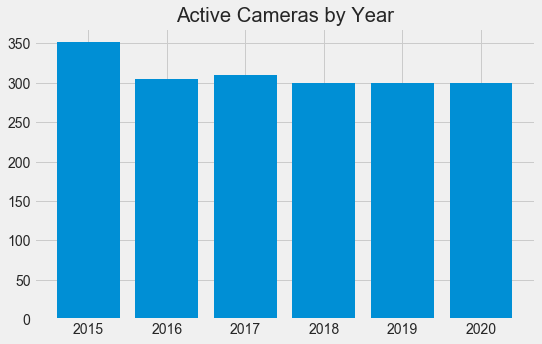

In [35]:
# how many rlc do we have by year.  Let's find out when they were OFF
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')

#print(results_df.groupby(['camera_id', 'year']).count().reset_index())
# how many in 2017?
year_cams = []
for year in range(2015, 2021):
    year_cams.append([year, len(results_df[results_df['year']==year].groupby('camera_id').count().reset_index())])
year_cams = np.array(year_cams)

plt.figure(figsize=[8,5])
plt.bar(year_cams[:,0], year_cams[:,1])
plt.title("Active Cameras by Year")
plt.show()

What about if we looked at a more granular level.  Let's go by month.  Look for big swings.

How does this compare to the number of violations during that time

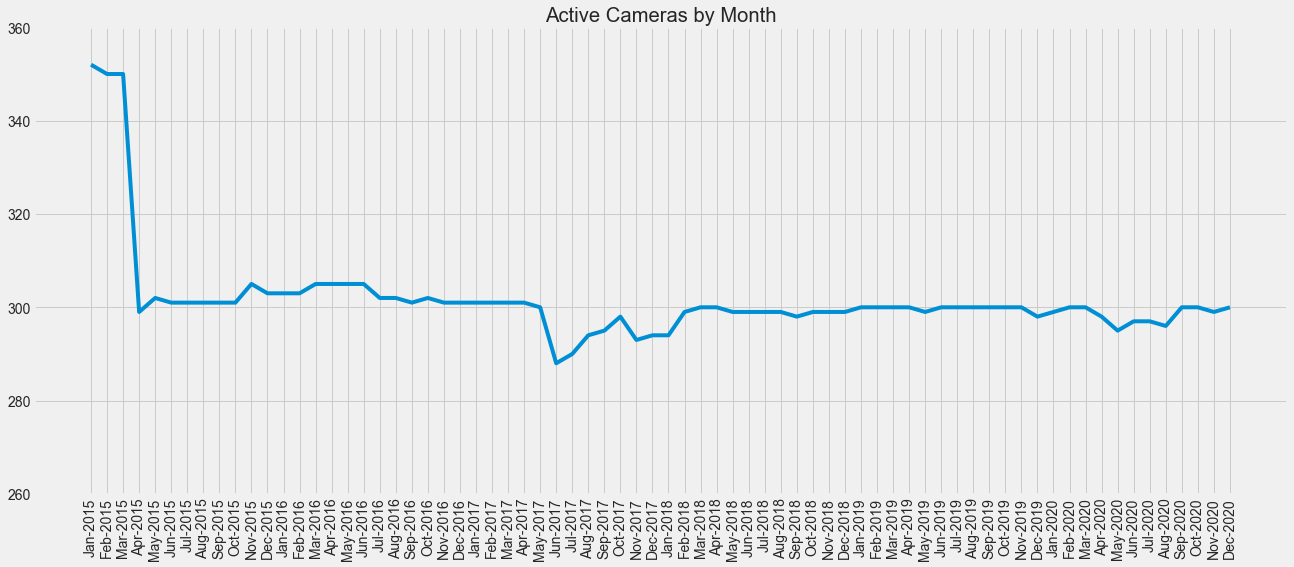

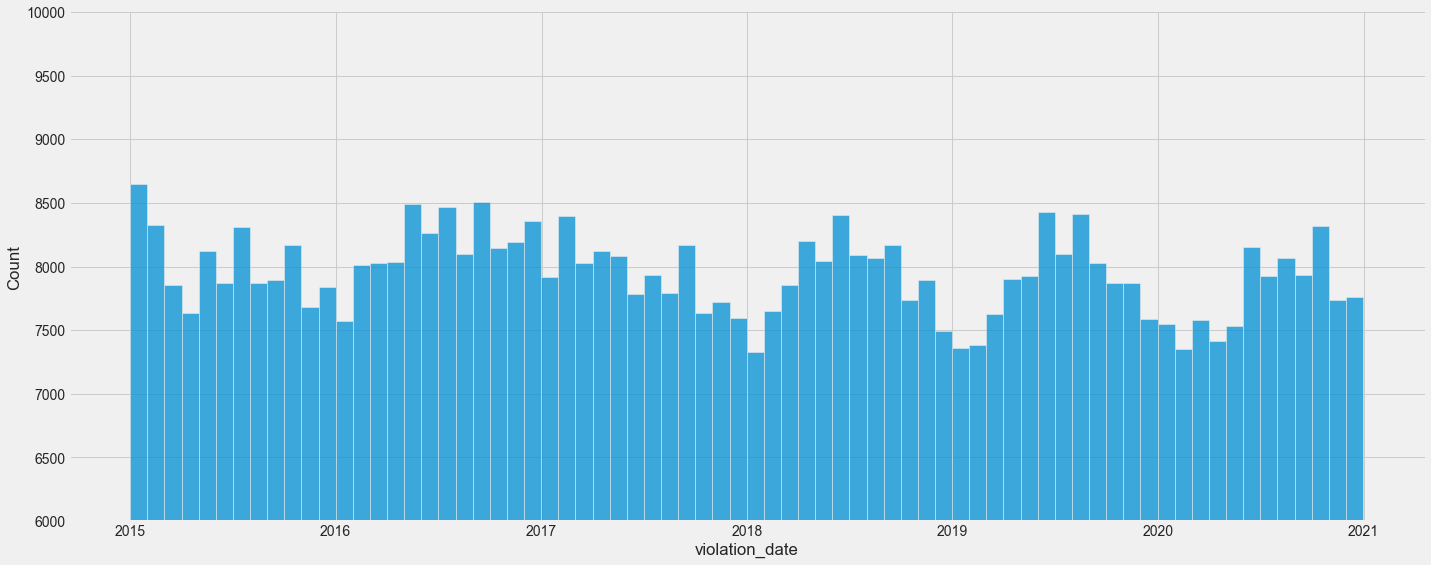

In [36]:


# lets look at a closer timeline of n cameras
month_cams = []
months = 'JanFebMarAprMayJunJulAugSepOctNovDec'
for y in range(2015, 2021):
    for m in range(1,13):
        month_cams.append([months[(m-1)*3:m*3] + "-" + str(y),
                               len(results_df[(results_df['year']==y) & (results_df['month']==m)]
                                .groupby('camera_id')
                                .count()
                                .reset_index())])
month_cams = np.array(month_cams)

plt.figure(figsize=[20,8])
plt.plot([x for x in range(len(month_cams[:,1]))], month_cams[:,1].astype(np.int))
plt.xticks([x for x in range(len(month_cams[:,1]))], month_cams[:,0], rotation=90)

plt.title("Active Cameras by Month")
plt.ylim(260, 360)
plt.show()


# Now do violations per month
sns.displot(results_df['violation_date'], 
            #kde_kws={"histtype": "step", "linewidth": 1,"alpha": 1, "color": "b"},
            bins=6*12, 
            #kde=True, 
            height=8, 
            aspect=2.5)
plt.ylim(6000, 10000)
plt.show()

Looks like we had a bunch removed in 2015, and maybe some added at same time.  Thats our experiment.  
Question!!!  What are the start and end dates for each camera??? Probably need to look at each year and catch the start and end date, then label our 50+ cameras for our natural experiment.  We might not have a ton of data to work from.

Proposal:  Crashes were not recorded until 2015.  It wasn't fully mandatroy until Sept 2017 which unfortuantely is where the data is reliable.  However, we can go through every camera from 2015 to 2020 and look at the earliest date and latest date we have in the dataset.  That informs us when the camera went live or when it was shut down.  Reporting was by precinct.  The precinct is in the crash data  

Note:  In EDA, I see a lot of down time on cameras which will mess us up.  It's probably maintenance/road work/malfunction etc.  Probably need to do a check to see when camera is down.  Maybe just look at consecutive days of zero fines (maybe look as SD along with it).  Consecutive zeros can be chopped out of the dataset, or better yet... just fill in the mean for those dates.

In [37]:
cam_list = results_df['camera_id'].unique()

In [38]:
len(cam_list)  # we have 364 total.  That's interesting.  There are some short lived cameras in there.

363

In [39]:
# let's see if we can look at one camera and determine first and last date
# def min_date(my_df, cam_id):
#     start = results_df[results_df['camera_id']==cam_list[i]]['violation_date'].min()
#     #my_df['start'].apply(lambda x: )
#     return start

results_df['start'] = results_df['camera_id'].apply(lambda x: None)
results_df['end'] = results_df['camera_id'].apply(lambda x: None)
#results_df['camera_id'] = results_df['camera_id'].apply(lambda x: int(x))

    
#results_df.head()


In [40]:
#for cam in cam_list:
    #start = results_df[results_df['camera_id']==cam_list[i]]['violation_date'].min()
    #end = results_df[results_df['camera_id']==cam_list[i]]['violation_date'].max()
    #results_df.iloc['camera_id']['start'] = results_df.loc[results_df['camera_id']==cam]['start'] = start
    #results_df.loc[results_df['camera_id']==cam]['end'] = end

#start = results_df[results_df['camera_id']==cam_list[i]]['violation_date'].min()
#results_df = results_df.iloc[:100, :]

print('converting')
results_df['violation_date'] = pd.to_datetime(results_df['violation_date'])

cam_start = results_df.groupby(['camera_id'])['violation_date'].min().reset_index()
cam_end = results_df.groupby(['camera_id'])['violation_date'].max().reset_index()

cam_startend = cam_start.copy()
#print(cam_end[cam_end['camera_id']=='1503'].values[0][1])
cam_startend['end'] = cam_start['camera_id'].apply(lambda x: cam_end[cam_end['camera_id']==x].values[0][1])


# let's add the other columns we care about for cameras
#cam_startend['intersection'] = results_df.groupby(['camera_id'])


#print("START")
#results_df['start'] = results_df['camera_id'].apply(lambda x: cam_start[cam_start['camera_id']==x])['violation_date']

#print('END')
#results_df['end'] = results_df['camera_id'].apply(lambda x: cam_end[cam_end['camera_id']==x][:])

#results_df.head(100)

cam_startend.rename(columns={"violation_date": "start"}, inplace=True)

                                                    
cam_startend.head()

converting


camera_id      start        end
0      1002 2015-01-01 2020-12-31
1      1003 2015-01-01 2020-12-31
2      1011 2015-01-02 2020-12-31
3      1014 2015-01-01 2020-12-31
4      1023 2015-01-02 2020-12-31

In [41]:
cam_startend.T.apply(lambda x: x['camera_id'])

0      1002
1      1003
2      1011
3      1014
4      1023
       ... 
358    3051
359    3052
360    3072
361    3082
362    3084
Length: 363, dtype: object

In [42]:
#import timeit

# def get_max(df, cam_id):
#     my_max = df[df['camera_id']==cam_id].max()['violation_date']
#     return my_max



# get_max(cam_end, '1503')


# _results_df = results_df.iloc[:100, :]


# # Trying out some possible ways to builde the start end dates into my df
# results_df['end'] = results_df['camera_id'].apply(lambda x: get_max(cam_end, x))

# results_df.head()

In [43]:

def get_minmax(df, cam_id, which):
    if which == 'start':
        return(df[df['camera_id']==cam_id]['start'].values[0])
    else:
        return(df[df['camera_id']==cam_id]['end'].values[0])

print(get_minmax(cam_startend, '1002', 'start'))

print(cam_startend.head())


2015-01-01T00:00:00.000000000
  camera_id      start        end
0      1002 2015-01-01 2020-12-31
1      1003 2015-01-01 2020-12-31
2      1011 2015-01-02 2020-12-31
3      1014 2015-01-01 2020-12-31
4      1023 2015-01-02 2020-12-31


In [44]:
results_df.isna().sum()
results_df = results_df[results_df['camera_id'].notna()]
results_df.isna().sum()

intersection           0
camera_id              0
address                0
violation_date         0
violations             0
latitude               0
longitude              0
month                  0
weekday                0
year                   0
start             572318
end               572318
dtype: int64

In [45]:
def transform_location(x):
    if type(x) == tuple:
        return x
    else:
        return (float(x['latitude']), float(x['longitude']))

results_df['location'] = results_df['location'].apply(transform_location)
results_df.tail(50)

KeyError: 'location'

In [46]:
# this will be a dict for all of the intersections we look up.  We have fewer intersections than cams
used_ints = {}  # for next part.  Only want to do this once.  There is a limit on geocode usage from geopy.


In [47]:
'''
This section goes through all of the rlc and assigns latlong
Many lights are missing it.  
For each light, there is an address though.
We use geocoding to get the latlong

10min runtime
'''


# let's also get all of the red light cameras with their gps location.  
# This will aid in placing the accidents at rlc intersections later (if closer than threshold point to point)
# Some RLCs are missing location data,  but have addresses.  I can use geocoding I guess to look them up.

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="https://github.com/sciencelee/chicago_rlc")


#location = geolocator.geocode("175 5th Avenue NYC")
#print(location.address)
# out: Flatiron Building, 175, 5th Avenue, Flatiron, New York, NYC, New York, ...

#print((location.latitude, location.longitude))
# out: (40.7410861, -73.9896297241625)

#print(location.raw)
# out: {'place_id': '9167009604', 'type': 'attraction', ...}


# CAN USE THIS TO FIGURE OUT MY LAT LONG FROM RLC ADDRESS (or crash)


address_fix = {'2400 W VAN BUREN STREE': '2400 W VAN BUREN STREET',
               '4700 W IRVING PARK ROA': '4700 W IRVING PARK ROAD',
               '11500 S HALSTED STREE': '11500 S HALSTED STREET',
               '5500 S WENTWORTH AVEN': '5500 S WENTWORTH AVENUE',
                '10300 S HALSTED STREE': '10300 S HALSTED STREET',
               '3700 W IRVING PARK ROA': '3700 W IRVING PARK ROAD',
               '1600 W IRVING PARK ROA': '1600 W IRVING PARK ROAD',
               '7900 S JEFFERY BOULEV': '7900 S JEFFERY BOULEVARD',
               '2800 W IRVING PARK ROA': '2800 W IRVING PARK ROAD',
               '5200 W IRVING PARK ROA': '5200 W IRVING PARK ROAD',
               '3100 S DR MARTIN L KING': '3100 S MARTIN KING DRIVE',
               '1600 W DIVERSEY PARKWA': '1600 W DIVERSEY PARKWAY',
               '140 W KINZIE': '140 W Kinzie St',
                '150 N SACRAMENTO BOUL': '150 N SACRAMENTO BOUL',
               '800 N SACRAMENTO AVEN':'800 N SACRAMENTO AVENUE',
               '3200 N LAKESHORE DRIV':'3200 N LAKE SHORE DRIVE',
               '6400 W FULLERTON AVENU':'6400 W FULLERTON AVENUE',
               '6400 N MILWAUKEE AVEN':'6400 N MILWAUKEE AVENUE',
               '7900 S STONEY ISLAND':'7900 S Stony Island Ave',  
               '150 N SACRAMENTO BOUL':'150 N SACRAMENTO BOULEVARD',
                '3200 N LAKESHORE DRIVE':'3200 N Lake Shore Dr',
               '7900 S STONEY ISLAND AVENUE':'7900 S Stony Island Ave',
               '5600 W FULLERTON AVENU':'5600 W FULLERTON AVENUE',
               '8700 S LAFAYETTE AVEN':'8700 S LAFAYETTE AVENUE',
               '4400 N MILWAUKEE AVEN':'4400 N MILWAUKEE AVENUE',
              }

# def get_geocode(address, cam_id, intersection):
#     if address in address_fix.keys(): address = address_fix[address]  # errors in the dataset chars omitted

#     if address in used_addresses:
#         return used_addresses[address]
    
#     location = geolocator.geocode(address + ', Chicago, IL')
#     if location == None:
#         print(address+':'+address+',')
#     else:
#         used_addresses[address] = [(location.latitude, location.longitude), cam_id, intersection]
#         return (location.latitude, location.longitude)

# TRY 2.  Getting geocode errors.  Would like to stick with location, unless necessary
def get_geocode(orig_loc, address, cam_id, intersection):
    if type(orig_loc)==float:  # it's not a tuple, and has no location
        if address in address_fix.keys(): address = address_fix[address]  # errors in the dataset chars omitted

        if intersection in used_ints: 
            if cam_id not in used_ints[intersection][1]: # then add it
                used_ints[intersection][1].append(cam_id)
            return used_ints[intersection][0]  # if we have already seen this one just return loc

        # if we make it this far, we have no record of this cam_id yet, and it doesn't have a proper location
        location = geolocator.geocode(address + ', Chicago, IL')
        if location == None:
            print(address+':'+address+' : could not geolocate') # print it out if we can't find (address errors)
        else:
            used_ints[intersection] = [(location.latitude, location.longitude), [cam_id], intersection]
            #print('Geocode lookup:', intersection)
            return (location.latitude, location.longitude)
    
    else: # it's a proper location tuple, and assumed to be correct latlong
        #print("orig_loc:", orig_loc, intersection)
        if intersection in used_ints:
            # it's already in our dictionary, let's see if we have looked at this cam yet.
            if cam_id not in used_ints[intersection][1]: 
                used_ints[intersection][1].append(cam_id)
            return used_ints[intersection][0]
        
        # then it's a new one, so let's make a new dict entry for this intersection
        used_ints[intersection] = [orig_loc, [cam_id], intersection]
        return (float(orig_loc[0]), float(orig_loc[1]))


#print(results_df.columns)
#print(results_df.loc[1,'address'])
#results_df['location'] = results_df['address'].apply(get_geocode)

# there is a clean one liner in python for this, I just know it.  Experiment here.
results_df['location'] = results_df.apply(lambda x: get_geocode(x.location, x.address, x.camera_id, x.intersection), axis=1)

# some test code...
# for i in range(50):
#     x=results_df.iloc[i]
#     print('BEFORE', x.location, x.camera_id)
#     print('AFTER', get_geocode(x.location, 
#                       x.address, 
#                       x.camera_id, 
#                       x.intersection))
    
print(used_ints)

AttributeError: ("'Series' object has no attribute 'location'", 'occurred at index 0')

In [48]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572318 entries, 0 to 572317
Data columns (total 12 columns):
intersection      572318 non-null object
camera_id         572318 non-null object
address           572318 non-null object
violation_date    572318 non-null datetime64[ns]
violations        572318 non-null int64
latitude          572318 non-null float64
longitude         572318 non-null float64
month             572318 non-null int64
weekday           572318 non-null int64
year              572318 non-null int64
start             0 non-null object
end               0 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 56.8+ MB


In [49]:
print(results_df.head())
#results_df['latitude'] = results_df['location'].apply(lambda x: x[0])
#results_df['longitude'] = results_df['location'].apply(lambda x: x[1])


cam_startend.iloc[0]

#tryme = results_df.iloc[:10]
#print(tryme)

cam_startend[cam_startend['camera_id']=='2763']['start']

#tryme['camera_id'].apply(lambda x: cam_startend[cam_startend['camera_id']==x][1])
cam_startend.info()

# len(cam_startend.camera_id)
# len(cam_startend.camera_id.unique())

                 intersection camera_id                 address  \
0  IRVING PARK AND KILPATRICK      2763  4700 W IRVING PARK ROA   
1           115TH AND HALSTED      2552   11500 S HALSTED STREE   
2  IRVING PARK AND KILPATRICK      2764  4700 W IRVING PARK ROA   
3      ELSTON AND IRVING PARK      1503  3700 W IRVING PARK ROA   
4                4700 WESTERN      2141   4700 S WESTERN AVENUE   

  violation_date  violations   latitude  longitude  month  weekday  year  \
0     2015-04-09           4  41.953866 -87.716609      4        3  2015   
1     2015-04-08           5  41.684766 -87.642607      4        2  2015   
2     2015-04-19           4  41.953866 -87.716609      4        6  2015   
3     2015-04-23           3  41.953838 -87.720427      4        3  2015   
4     2019-06-05           3  41.808378 -87.684571      6        2  2019   

  start   end  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None  
<class 'pandas.core.frame.DataFrame'>
RangeI

In [50]:
# pickle my data so I don't have to run all that again.
# We have a limit on geopy uses per day.
# This should set us up for being done with red light stuff, and moving on to crash data|

# with open('used_ints.pkl', 'wb') as f:
#     pickle.dump(used_ints, f)

# # with open('used_cams.pkl', 'wb') as f:
# #     pickle.dump(used_cams, f)

# # with open('all_data.pkl', 'wb') as f:
# #     pickle.dump(results_df, f)
    
# # let's bring in our used_addresses now
# # import pickle
# # import pandas as pd


# with open('used_ints.pkl', 'rb') as f:
#     used_ints = pickle.load(f)




# print(used_ints)
# # print(len(used_addresses))
# # print(len(results_df['camera_id'].unique()))

In [51]:
results_df.head()

intersection camera_id                 address  \
0  IRVING PARK AND KILPATRICK      2763  4700 W IRVING PARK ROA   
1           115TH AND HALSTED      2552   11500 S HALSTED STREE   
2  IRVING PARK AND KILPATRICK      2764  4700 W IRVING PARK ROA   
3      ELSTON AND IRVING PARK      1503  3700 W IRVING PARK ROA   
4                4700 WESTERN      2141   4700 S WESTERN AVENUE   

  violation_date  violations   latitude  longitude  month  weekday  year  \
0     2015-04-09           4  41.953866 -87.716609      4        3  2015   
1     2015-04-08           5  41.684766 -87.642607      4        2  2015   
2     2015-04-19           4  41.953866 -87.716609      4        6  2015   
3     2015-04-23           3  41.953838 -87.720427      4        3  2015   
4     2019-06-05           3  41.808378 -87.684571      6        2  2019   

  start   end  
0  None  None  
1  None  None  
2  None  None  
3  None  None  
4  None  None

In [52]:
cam_start[cam_start['camera_id']=='2763']['violation_date'].values[0]
cam_startend.head()

camera_id      start        end
0      1002 2015-01-01 2020-12-31
1      1003 2015-01-01 2020-12-31
2      1011 2015-01-02 2020-12-31
3      1014 2015-01-01 2020-12-31
4      1023 2015-01-02 2020-12-31

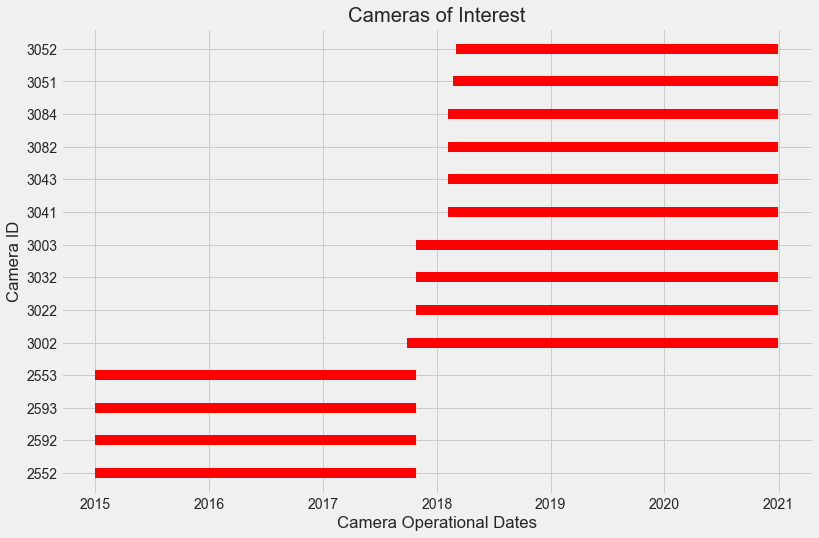

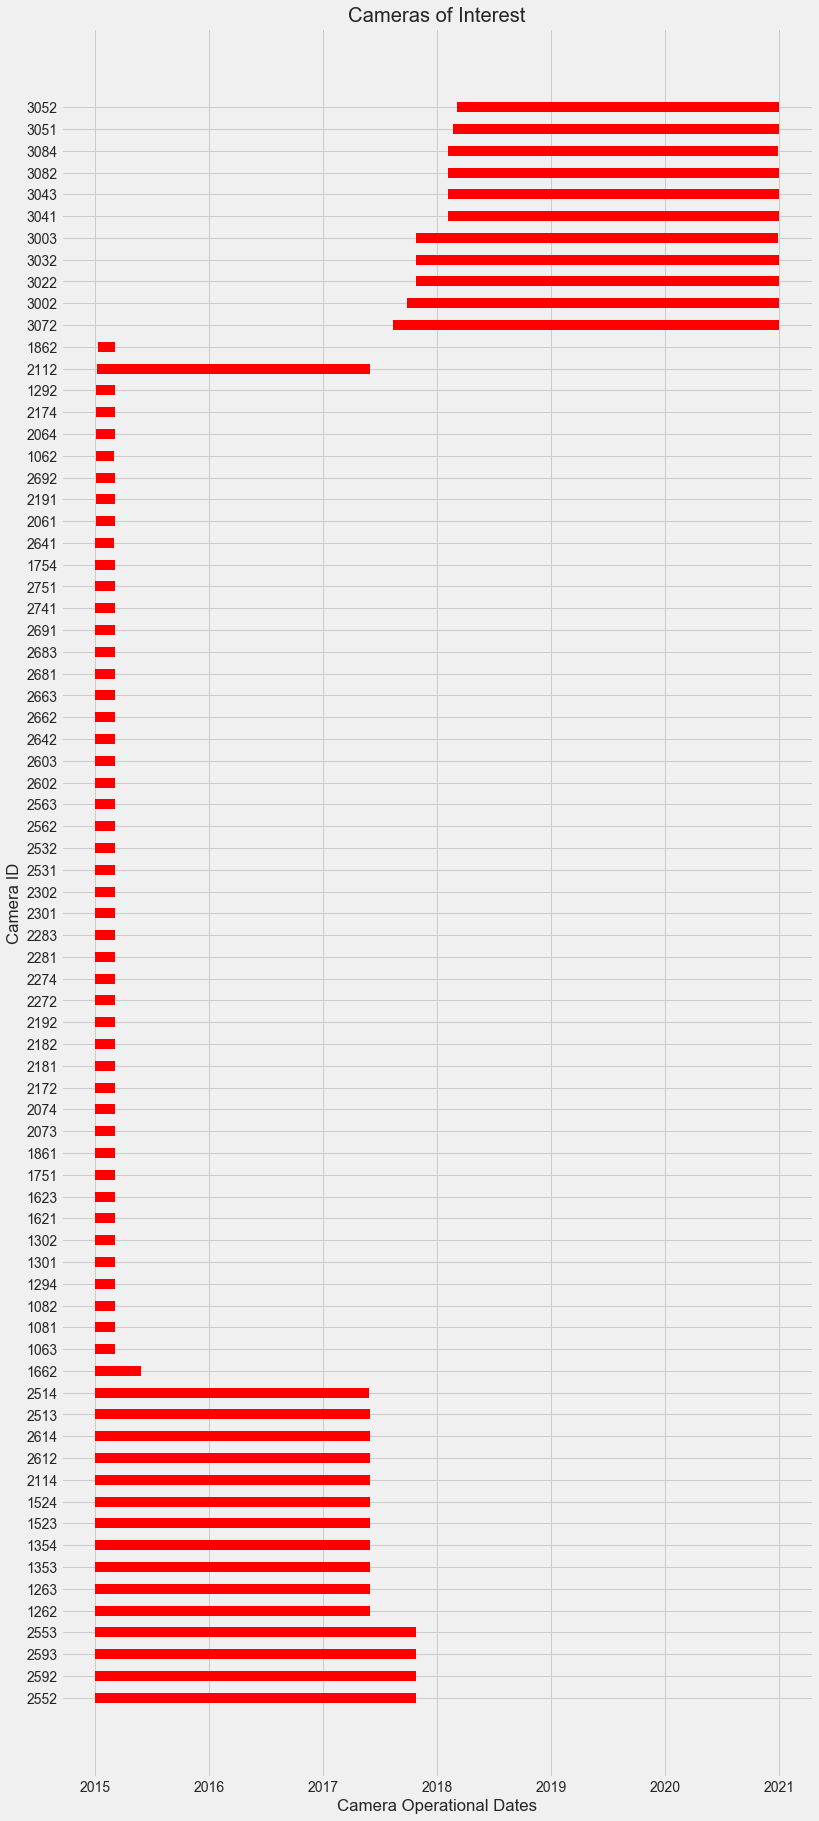

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
#parser.parse("Aug 28 1999 12:00AM")

start = cam_startend['start'].min()
end = cam_startend['end'].max()
x = np.arange(start, end, dtype='datetime64[D]')
cam_startend.sort_values(by=['start', 'end'], ascending=[True, False], inplace=True)
my_start_date = '2017-09-01'  # can also use '2017-09-01' for reporting requirment

# plot and grab ids for all cams that were installed during timeframe 2017 through current that edned or started
# during the same time
plt.figure(figsize=[12,8])
cams_of_interest = []
for i in range(len(cam_startend)):
    cam = cam_startend.iloc[i]
    if (cam['start'] > parser.parse(my_start_date) or parser.parse(my_start_date) < cam['end'] < parser.parse('2020-10-01')):
        #print(cam[1], "PARSED", parser.parse('2015-04-01'))
        cams_of_interest.append(cam['camera_id'])
        plt.plot([cam[1], cam[2]], [cam[0], cam[0]], linewidth=10, linestyle='-', color='red')
    
plt.title('Cameras of Interest')
plt.ylabel('Camera ID')
plt.xlabel('Camera Operational Dates')
plt.show()


# we may choose to go all the way back to beginning of 2015 when we began recording accidents.
# some precincts did not fully comply until sept 2017 though
cams_of_interest2 = []
plt.figure(figsize=[12,30])

for i in range(len(cam_startend)):
    cam = cam_startend.iloc[i]
    if (cam[1] > parser.parse('2015-02-01') or parser.parse('2015-02-01') < cam[2] < parser.parse('2020-10-01')):
        #print(cam[1], "PARSED", parser.parse('2015-04-01'))
        cams_of_interest2.append(cam[0])
        plt.plot([cam[1], cam[2]], [cam[0], cam[0]], linewidth=10, linestyle='-', color='red')
    
plt.title('Cameras of Interest')
plt.ylabel('Camera ID')
plt.xlabel('Camera Operational Dates')
plt.show()

In [ ]:
print('Cameras turned on or off during crash reporting:', len(cams_of_interest))
print('Cameras turned on or off during partial crash reporting:', len(cams_of_interest2))


In [ ]:
print(cams_of_interest)
print()
print(cams_of_interest2)

In [ ]:
# I would like to add start end dates to my intersections as well

In [ ]:
# now we need to figure out what those intersections are and the relative time dates for each


interest_df = results_df[results_df['camera_id'].isin(cams_of_interest)]

print(len(interest_df))
# we have 13k accidents with these cams, so maybe enough to do AB test or something

interest_df = interest_df[interest_df['violation_date'] > parser.parse('01-09-17')]

print(len(interest_df))
# after filtering out the ones that were before accurate reporting, we are sadly down to ~10k 

In [ ]:
interest_df.columns

In [ ]:
# NEED DATA TO SEND FOR NATURAL EXPERIMENT


interest_df.info()
interest_df.longitude.unique()
interest_df.latitude.unique()
interest_df['camera_id'].head()


# clean up my new dataset to be consistendt with locations
cam_address_loc = []

for cam in cams_of_interest:
    address = interest_df[interest_df['camera_id'] == cam]['address'].max()
    intersection = interest_df[interest_df['camera_id'] == cam]['intersection'].max()

    cam_address_loc.append([cam, address, intersection])
    

cam_address_loc

In [ ]:
print('Total Cams:', len(results_df.camera_id.unique()))
print()

print('Total Cams of Interest:', len(cams_of_interest))
print('Cams of Interest:', cams_of_interest)
print()

print("Total crashes with na for lat/long:", results_df['latitude'].isna().sum())
print('Perecentage na for lat/long:', results_df['location'].isna().sum()/len(results_df) * 100)
cams_na = results_df[results_df['location'].isna()]['camera_id'].unique()  # cams that have na values
print('Cams that have na for lat/long:', len(cams_na))
print()
# we are missing the location data for 5% of data


# which cams of interest are also na values?
na_cams_of_interest = []
for cam in cams_na:
    if cam in cams_of_interest:
        if cam not in na_cams_of_interest:
            na_cams_of_interest.append(cam)

print("These {} cams of interest have no location values: {}".format(len(na_cams_of_interest), na_cams_of_interest))

# Since my data 'of interest' is sparse, I will add lat/long and while I'm there, I will just add them for all of the cams


In [ ]:
cams_na


In [ ]:
results_df.location[1]

In [ ]:
# also need to assign every rlc to a road segment
# we can use this https://stackoverflow.com/questions/24415806/coordinates-of-the-closest-points-of-two-geometries-in-shapely
# https://data.cityofchicago.org/Transportation/Chicago-Traffic-Tracker-Congestion-Estimates-by-Se/n4j6-wkkf
# This has segment ID numbers 1250 of them.
# Segments have start and end lon/lat, we can make into line.  
# rlcs can be points, and shapely has a distance method for finding dist between. Point.distance(Linestring)
# go through all of the Linestrings, then use the min to determine what segment it is on.  
# The segments are more than 300 miles total and are all major surface streets in Chicago
